<img src="images/glambie_logos.png" alt="logo"/>

#<strong><font color='#11847C'> Gla</font>cier <font color='#11847C'>M</font>ass <font color='#11847C'>B</font>alance <font color='#11847C'>I</font>ntercomparison <font color='#11847C'>E</font>xercise - *A community effort to reconcile measurements of glacier mass balance*</strong>

##This Jupyter Notebook can be used to explore and visualise the final results from the Glacier Mass Balance Intercomparison Exercise (GlaMBIE). In the following code, you can choose from the 19 regions covered by the GlaMBIE project, and investigate the findings, including a comparison of the mass change measured in different regions.

<div>

## <strong>Getting started</strong>
</div>

First, we import the necessary packages

In [ ]:
!git clone https://github.com/earthwave/glambie_demo_notebooks

import os
local_path = '/data/ox1/working/glambie/demo_notebooks'
os.chdir(local_path)

In [1]:
import pandas as pd
import glob, os

from glambie_demo_notebooks.helpers import glambie_regions_dropdown, derivative_to_cumulative
from glambie_demo_notebooks.plotting import single_region_derivative_plot, single_region_cumulative_plot, two_region_comparison_plot

import seaborn as sns
sns.set_theme(palette='colorblind', style='white', font_scale=1.2)
sns.set_style({'axes.linewidth': 2, 'axes.edgecolor':'lightgrey'})


Next, load the GlaMBIE results into this Colab instance

In [ ]:
# This line is only needed when sharing the notebooks with GlaMBIE consortium - they will need to drag and drop the unpublished zip file into colab, and then unzip it to access data
# We will replace this step with a download link when the data has been published
!unzip GlaMBIE_Final_Dataset-202408.zip

Each of the results files is downloaded to the current Colab working environment. You can inspect them if you click on the 'Folder' icon on the panel to the left.

<div>

## <strong>Choose a region</strong>
</div>

In this section, you can pick from the 19 RGI regions. The region that you chose will be read in from file.

In [3]:
temporal_option = 'hydrological_years'
data_directory = os.path.join(local_path, 'Final_Dataset', temporal_option)

list_of_csvs = sorted(glob.glob(os.path.join(data_directory, '*.csv')))

Run this cell to select a GlaMBIE region from the dropdown list of options

In [4]:
# Use the dropdown menu to choose a region for analysis:
region = glambie_regions_dropdown()
region

Dropdown(description='Region:', options={'Alaska': '1_alaska', 'Western Canada & USA': '2_western_canada_us', …

The following plot shows the change in elevation of your chosen region, for each year in the GlaMBIE study period (2000 - 2023). The y-axis is shown in *metres water equivalent*. This unit (1 m w.e. = 1,000 kg m−2) represents the mass change averaged over the glacier surface and allows comparison of the intensity of mass change in regions of different sizes. 

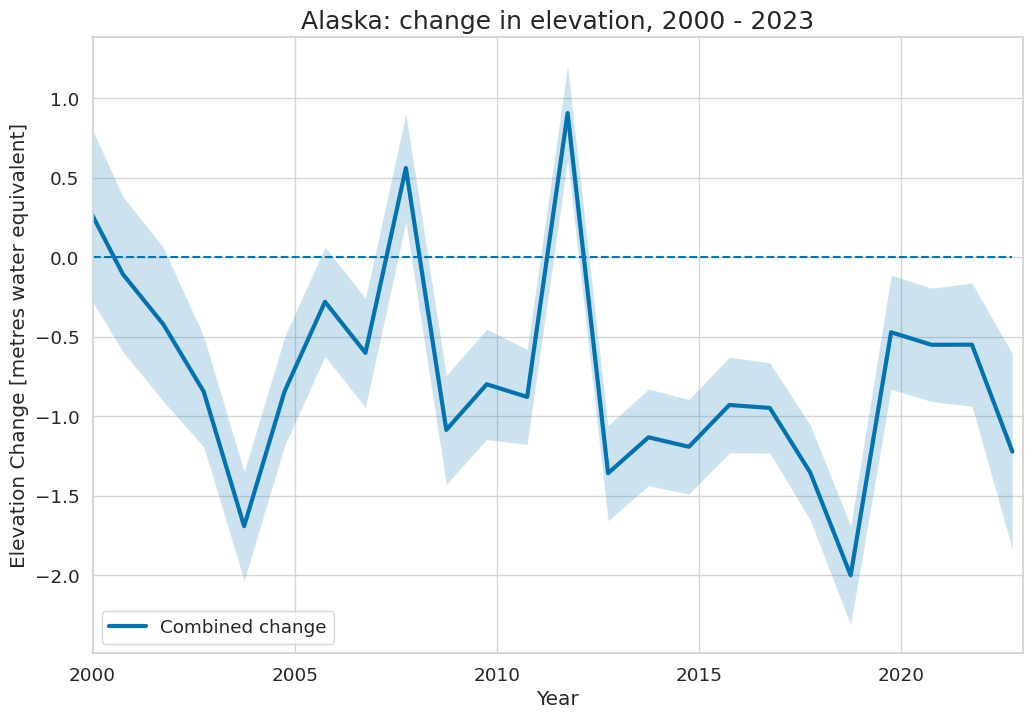

In [5]:
for filename in list_of_csvs:
    if region.value in filename:
        region_dataframe = pd.read_csv(filename)

single_region_derivative_plot(region_dataframe, region.value, 'metres water equivalent')

<div>

## <strong>Plot cumulative ice loss for the region that you have chosen</strong>
</div>

Next we will plot the cumulative change measured in your chosen region, over the full GlaMBIE study period.

In [6]:
# Start with a simple cumulative mwe plot - explain that the following plot shows how many m of ice each region has lost over the last 24 years
cumulative_data_all_mwe = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.combined_mwe)
cumulative_errors_all_mwe = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.combined_mwe_errors, calculate_as_errors=True)

The plot below shows the cumulative change in *meters water equivalent*

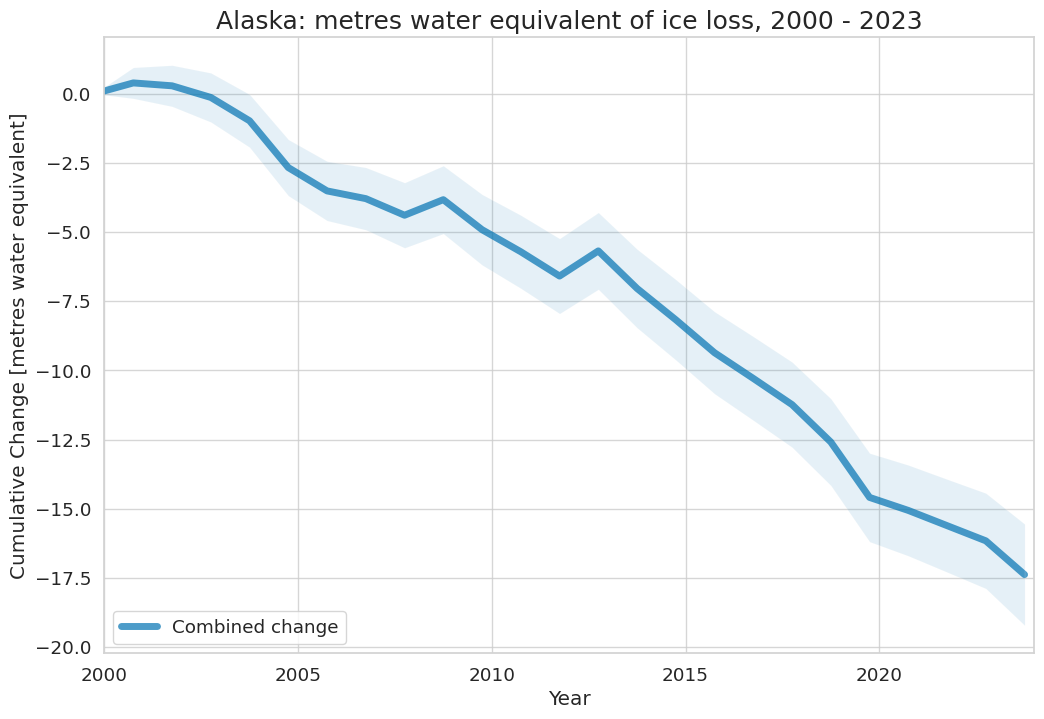

In [7]:
single_region_cumulative_plot(cumulative_data_all_mwe, cumulative_errors_all_mwe, region.value, 'metres water equivalent')

In [8]:
# convert to cumulative changes - Gt
cumulative_data_all_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.combined_gt)
cumulative_errors_all_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.combined_gt_errors, calculate_as_errors=True)

cumulative_data_altimetry_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.altimetry_gt)
cumulative_data_gravimetry_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.gravimetry_gt)
cumulative_data_demdiff_and_glaciological_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.demdiff_and_glaciological_gt)

In the next plot we visualise the change for your chosen region in units of Gigatonnes (1 Gt = 1,000,000,000,000 kg). This demonstrates the total mass of ice that has been lost from the region over the GlaMBIE study period. Additionally in this plot, the contributions to the total overall change from the different GlaMBIE observational sources are shown (as dashed lines). These include: altimetry (orange), gravimetry (blue) and DEM differencing & glaciological measurements (pink). For more details on each of these measurement techniques, see the GlaMBIE publication (add link).

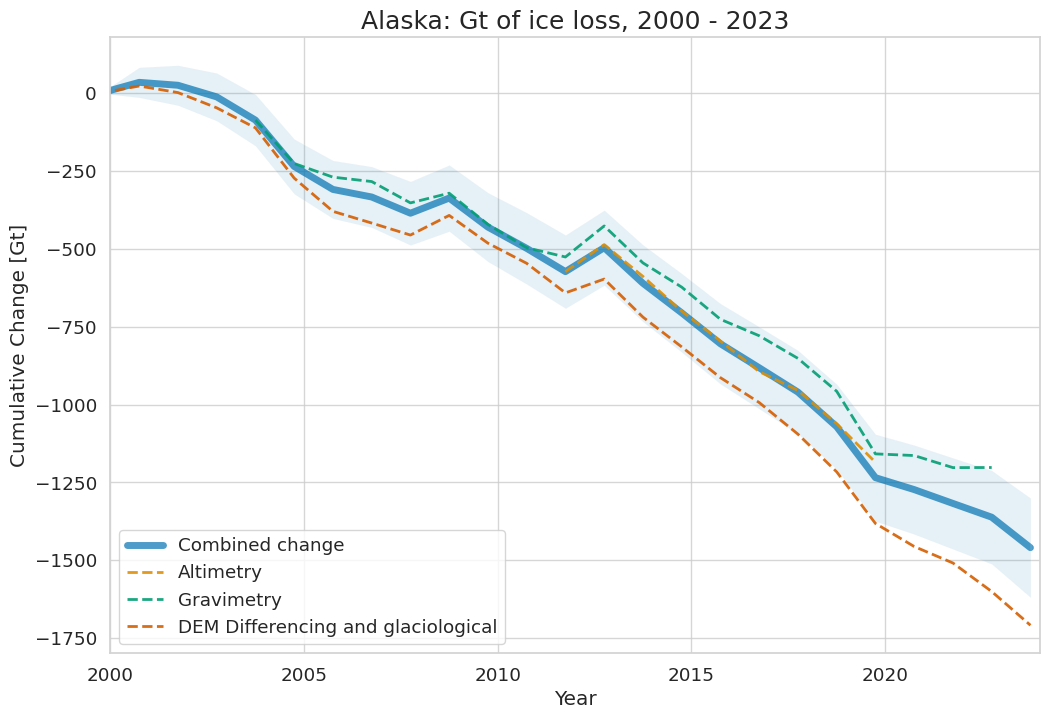

In [9]:
single_region_cumulative_plot(cumulative_data_all_gt, cumulative_errors_all_gt, region.value, 'Gt',
                              cumulative_data_altimetry_gt, cumulative_data_gravimetry_gt, cumulative_data_demdiff_and_glaciological_gt)

<div>

## <strong>Choose an additional region to perform a simple comparison</strong>
</div>

Use the following dropdown to pick a second GlaMBIE region. 

In [10]:
comparison_region = glambie_regions_dropdown(region.value)
comparison_region

Dropdown(description='Region:', options={'Western Canada & USA': '2_western_canada_us', 'Arctic Canada North':…

In [11]:
for filename in list_of_csvs:
    if comparison_region.value in filename:
        region_dataframe_comparison = pd.read_csv(filename)

cumulative_data_all_gt_comparison = derivative_to_cumulative(region_dataframe_comparison.start_dates, region_dataframe_comparison.end_dates, region_dataframe_comparison.combined_gt)
cumulative_errors_all_gt_comparison = derivative_to_cumulative(region_dataframe_comparison.start_dates, region_dataframe_comparison.end_dates, region_dataframe_comparison.combined_gt_errors, calculate_as_errors=True)

cumulative_data_all_mwe_comparison = derivative_to_cumulative(region_dataframe_comparison.start_dates, region_dataframe_comparison.end_dates, region_dataframe_comparison.combined_mwe)
cumulative_errors_all_mwe_comparison = derivative_to_cumulative(region_dataframe_comparison.start_dates, region_dataframe_comparison.end_dates, region_dataframe_comparison.combined_mwe_errors, calculate_as_errors=True)

In the final plot shown below, we compare the cumulative change for the two regions that you have chosen. In the left panel, we compare the cumulative change in Gt. If you have picked regions that vary signifcantly in size, one may have a much larger total change in Gt. In the right panel, we compare the cumulative change in metres water equivalent, which allows a comparison that removes the impact of glacier area.

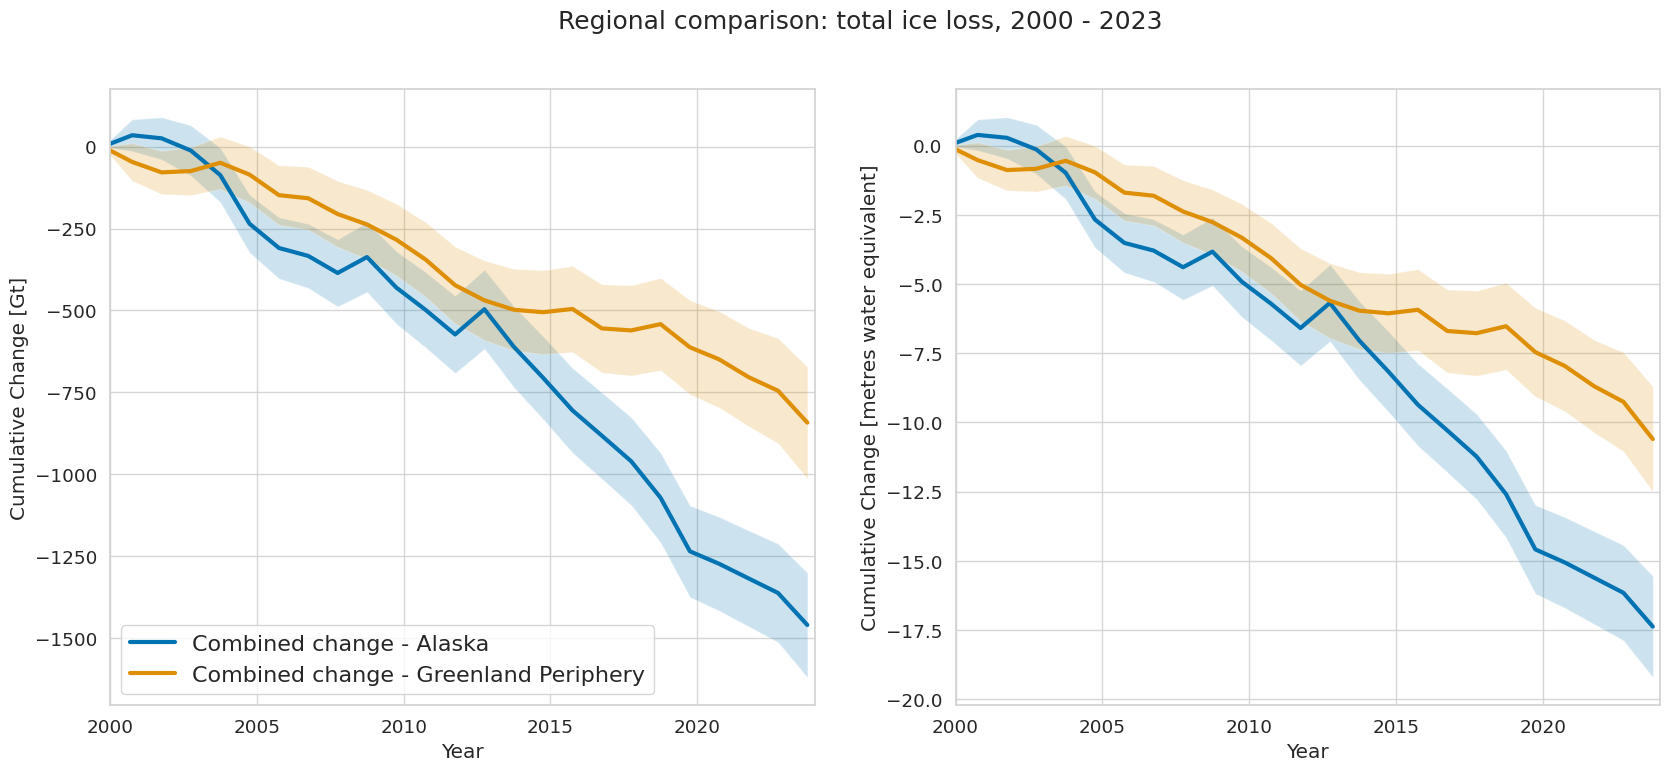

In [12]:
two_region_comparison_plot(region.value, comparison_region.value, cumulative_data_all_gt, cumulative_errors_all_gt, cumulative_data_all_gt_comparison,
                           cumulative_errors_all_gt_comparison, cumulative_data_all_mwe, cumulative_errors_all_mwe,
                           cumulative_data_all_mwe_comparison, cumulative_errors_all_mwe_comparison)
